<a href="https://colab.research.google.com/github/mashyko/Image-Classifier-Keras/blob/master/Keras_MNIST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNISTデータの手書き数字識別(1)：3層パーセプトロン・モデル
Examples adopted from this site:
https://employment.en-japan.com/engineerhub/entry/2017/04/28/110000#functional-APIを使ったモデルの書き方

MNISTデータを読み込む

それでは、いよいよ実際にコードを動かしていきましょう。まず、MNISTデータを読み込みます。
MNISTデータ
アメリカ国立標準技術研究所（NIST）が用意した手書き数字の画像データベースで、機械学習の分野で画像認識の入門用サンプルとして利用されている。

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


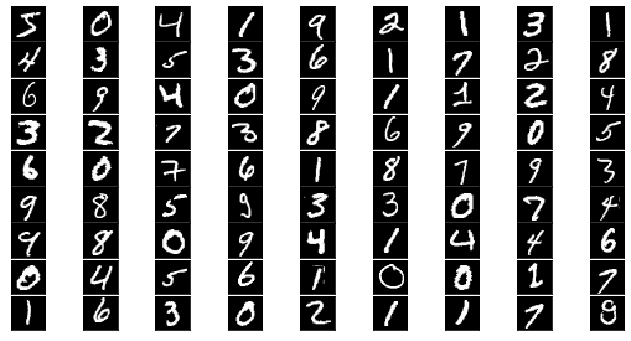

In [0]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割してくれる
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

どの画像がどの数字かを認識するプログラム

これを使って、どの画像がどの数字かを認識するプログラムを書いていきます。
まず、機械が計算しやすい形に、データを変換します。
reshapeは、28×28画素の画像を784×1のデータに変換しています。
to_categoricalという処理は、y_trainに入っている1、4、2、6などの数字のラベルを、次のように変換しています（one-hotと言います）。
0→[1,0,0,0,0,0,0,0,0,0]
1→[0,1,0,0,0,0,0,0,0,0]
2→[0,0,1,0,0,0,0,0,0,0]
3→[0,0,0,1,0,0,0,0,0,0]
…

In [0]:
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


次にいよいよモデルを定義します。Sequentialモデルを使います。
addメソッドで追加しているDenseは、全結合層です。次のような引数を取っています。
引数	説明
512	ニューロンの数
activation	活性化関数の指定
input_shape	最初の層では入力の形を指定しなければいけない。それ以降の層では不要
Dropoutはディープラーニングの過学習を防ぐために行います。Dropoutは、全結合の層とのつながりをランダムに切断してあげることで、過学習を防ぎます。0.2という数字は、その切断する割合を示しています。

compileメソッドでは、学習の際の設定を行います。
引数	説明
loss	損失関数
optimizer	最適化手法
metrics	評価指標


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


fitメソッドで、学習を行います。epochsの数だけループします。
引数	説明
batch_size	学習データから設定したサイズごとにデータを取り出し、計算を行う
epochs	モデルを学習するエポック数（学習データ全体を何回繰り返し学習させるか）を指定する（バージョン2.0で名前が変更された）
verbose	0：標準出力にログを出力しない、1：ログをプログレスバーで標準出力、2：エポックごとに1行のログを出力
戻り値をhistoryで受けています。

この中にはそれまでの学習の経過が入っているので、matplotlibで表示してみましょう。

In [0]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2459 - acc: 0.9240 - val_loss: 0.1196 - val_acc: 0.9606
Epoch 2/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1035 - acc: 0.9693 - val_loss: 0.0825 - val_acc: 0.9760
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0745 - acc: 0.9773 - val_loss: 0.0816 - val_acc: 0.9767
Epoch 4/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0612 - acc: 0.9811 - val_loss: 0.0670 - val_acc: 0.9814
Epoch 5/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0511 - acc: 0.9848 - val_loss: 0.0685 - val_acc: 0.9826
Epoch 6/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0836 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0366 - acc: 0.9892 - val_loss: 0.

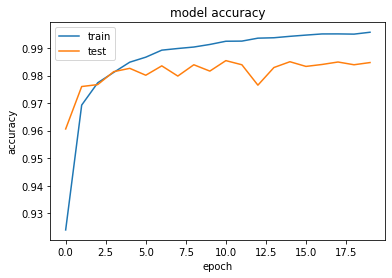

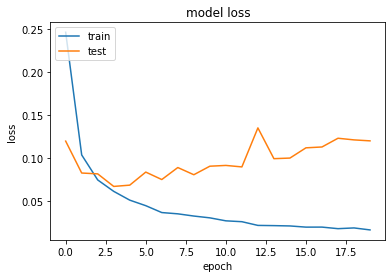

In [0]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

手書き数字識別（２）：CNNを使って画像を認識する

先ほどは、画像の画素値を、そのまま特徴量として使いました。そのため2次元のデータを1次元に変換したのですが、こう変換してしまうと、上下左右の画素値同士の関係性は考慮されなくなります。
ディープラーニングで画像認識する場合には、一般的にCNN（Convolutional Neural Network、畳み込みニューラルネットワーク）を使います。これにより空間的な特徴を捉えることができます。
Conv2Dメソッドでは、kernel_sizeで指定した範囲の画像を見て、畳み込みを行っています。画像における畳み込み計算は、簡単にいうとフィルター処理です（このフィルターは、カーネルとも呼ばれます）。

In [0]:
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Kerasのバックエンドで動くTensorFlowとTheanoでは入力チャンネルの順番が違うので場合分けして書いています
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0402 - acc: 0.9863 - val_loss: 0.0099 - val_acc: 0.9962
Epoch 2/12
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0156 - acc: 0.9950 - val_loss: 0.0073 - val_acc: 0.9975
Epoch 3/12
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0068 - val_acc: 0.9977
Epoch 4/12
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0064 - val_acc: 0.9978
Epoch 5/12
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0056 - val_acc: 0.9980
Epoch 6/12
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0075

また、MaxPooling2Dメソッドでは、pool_sizeの範囲を見て、その中で最も大きな値を次の層に渡します。
これにより、手書きの線が多少ずれていても、同じような特徴を取り出すことができます。
Flattenは、2次元（2D）の特徴を1次元に引き延ばす操作です。

これを実行すると、テストデータでの正答率が99.25%という結果になりました。
先ほどのCNNを使わない試行では最高の正答率が98.47%だったので、精度が向上しました。

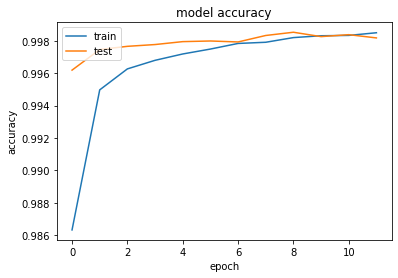

In [0]:
#正答率
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

以上
